**Dataset Columns**

Id

SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

Exploratory Data Analysis

In [3]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [4]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [5]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


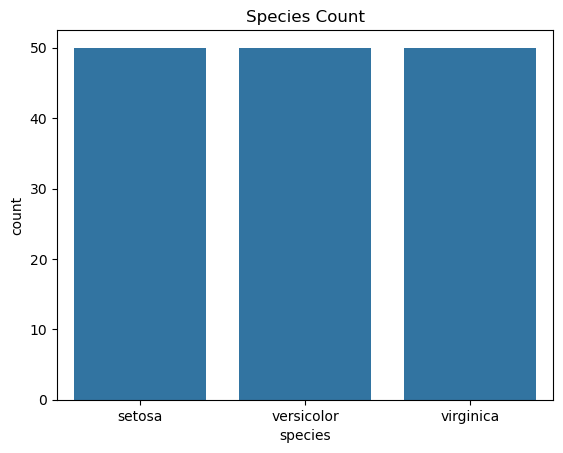

In [6]:
sns.countplot(x='species', data=df)
plt.title("Species Count")
plt.show()

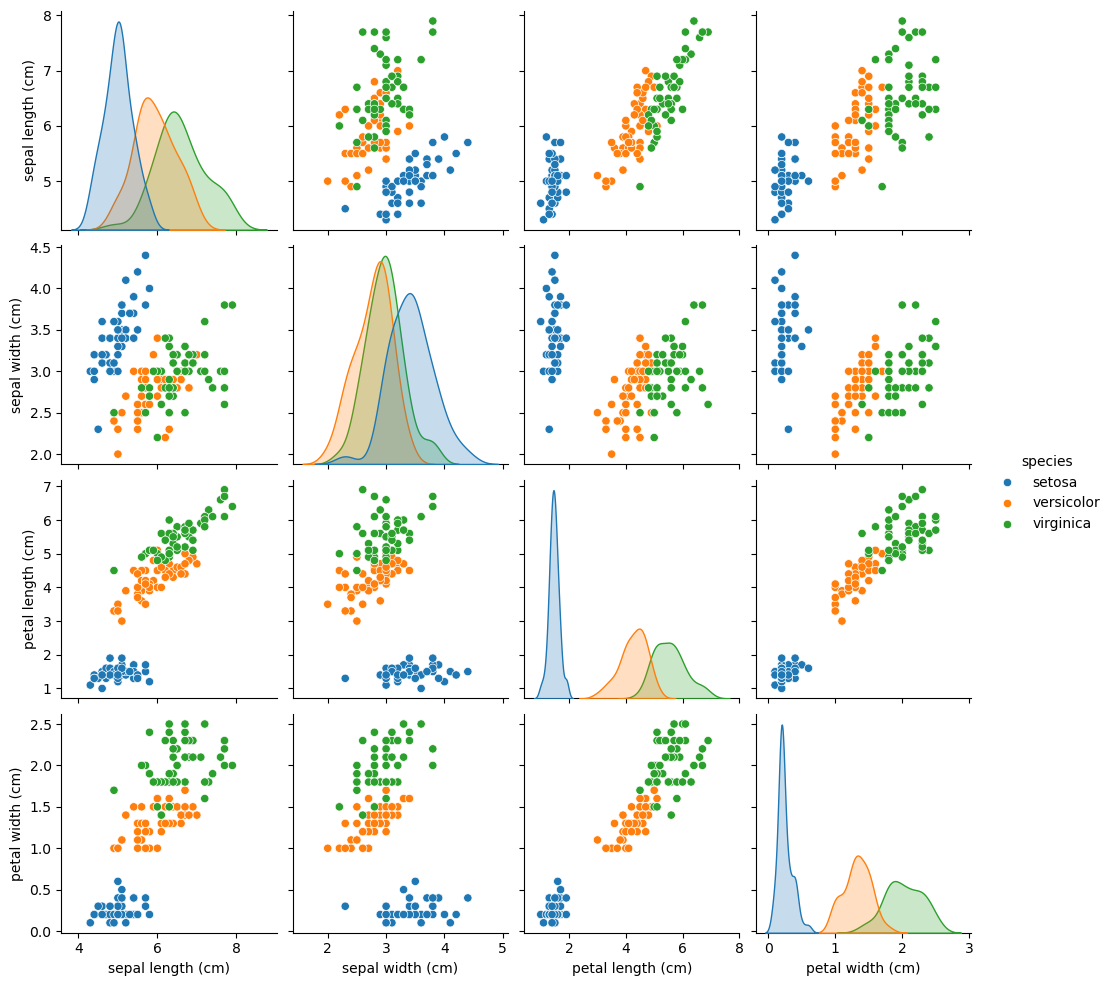

In [7]:
sns.pairplot(df, hue='species')
plt.show()

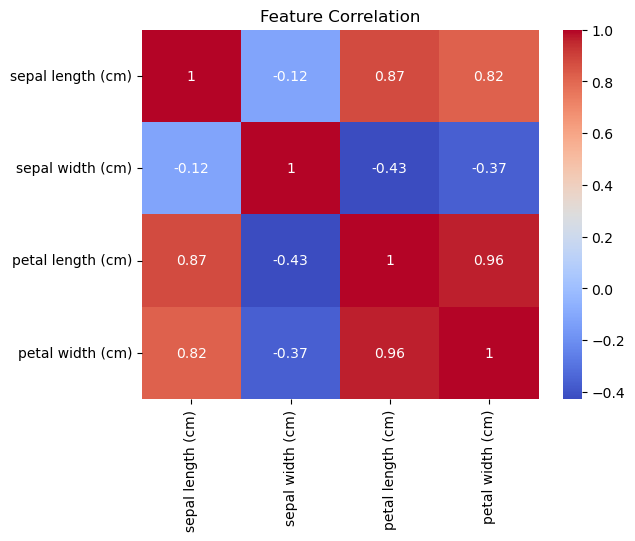

In [8]:
corr = df.drop(columns='species').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [10]:
X = df.drop('species', axis=1)
y = df['species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Random Forest Classifier

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Evaluate

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [15]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [16]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




🚀 Evaluating Logistic Regression using 5-fold CV...
📊 Logistic Regression - Avg Scores over 5 folds:
Accuracy: 0.9533, Precision: 0.9549, Recall: 0.9533, F1-Score: 0.9532

🚀 Evaluating Decision Tree using 5-fold CV...
📊 Decision Tree - Avg Scores over 5 folds:
Accuracy: 0.9533, Precision: 0.9572, Recall: 0.9533, F1-Score: 0.9531

🚀 Evaluating Random Forest using 5-fold CV...
📊 Random Forest - Avg Scores over 5 folds:
Accuracy: 0.9467, Precision: 0.9512, Recall: 0.9467, F1-Score: 0.9464

🚀 Evaluating SVM (RBF) using 5-fold CV...
📊 SVM (RBF) - Avg Scores over 5 folds:
Accuracy: 0.9533, Precision: 0.9549, Recall: 0.9533, F1-Score: 0.9532

🚀 Evaluating KNN using 5-fold CV...
📊 KNN - Avg Scores over 5 folds:
Accuracy: 0.9667, Precision: 0.9684, Recall: 0.9667, F1-Score: 0.9666

🚀 Evaluating Naive Bayes using 5-fold CV...
📊 Naive Bayes - Avg Scores over 5 folds:
Accuracy: 0.9467, Precision: 0.9488, Recall: 0.9467, F1-Score: 0.9465

🚀 Evaluating Gradient Boosting using 5-fold CV...
📊 Gradien

c:\Users\zshua\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:03:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\zshua\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:03:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\zshua\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:03:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\zshua\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:03:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

📊 XGBoost - Avg Scores over 5 folds:
Accuracy: 0.9400, Precision: 0.9451, Recall: 0.9400, F1-Score: 0.9389

📈 Final Model Comparison (5-Fold CV):
              Model  Accuracy  Precision   Recall  F1-Score
                KNN  0.966667   0.968350 0.966667  0.966583
Logistic Regression  0.953333   0.954882 0.953333  0.953216
          SVM (RBF)  0.953333   0.954882 0.953333  0.953216
      Decision Tree  0.953333   0.957239 0.953333  0.953115
  Gradient Boosting  0.953333   0.957239 0.953333  0.953115
        Naive Bayes  0.946667   0.948822 0.946667  0.946533
      Random Forest  0.946667   0.951178 0.946667  0.946432
            XGBoost  0.940000   0.945118 0.940000  0.938900


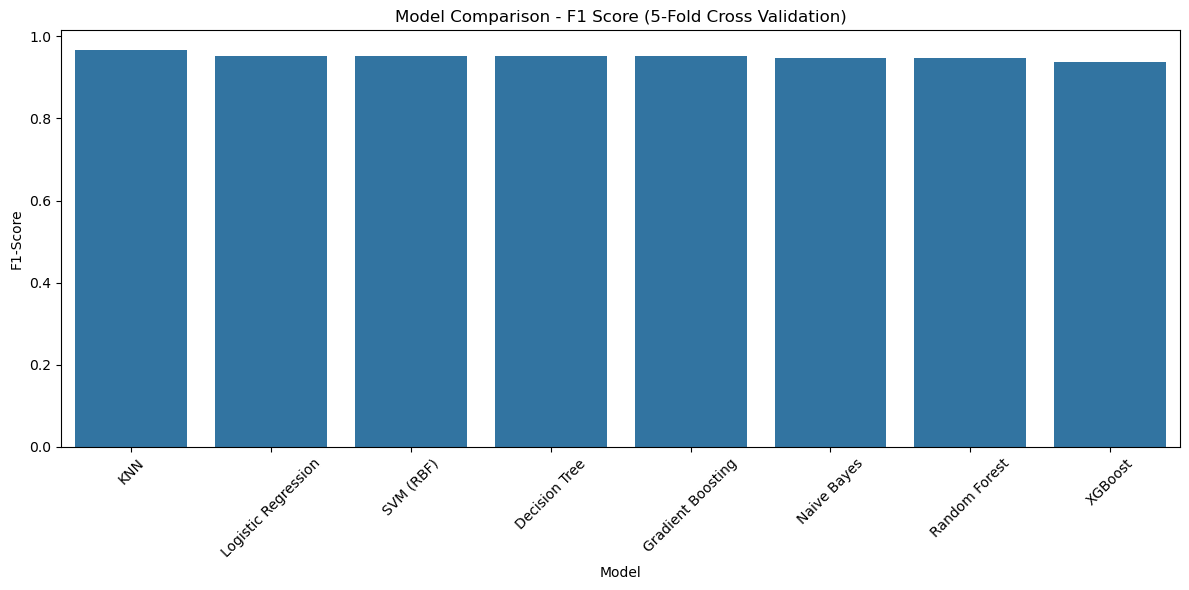

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier inspection
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (RBF)": OneVsRestClassifier(SVC(kernel='rbf', probability=True)),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = []

# Use StratifiedKFold for better class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n🚀 Evaluating {name} using 5-fold CV...")

    # Cross-validation scores
    acc_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    prec_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='precision_weighted')
    rec_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='recall_weighted')
    f1_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='f1_weighted')

    mean_acc = np.mean(acc_scores)
    mean_prec = np.mean(prec_scores)
    mean_rec = np.mean(rec_scores)
    mean_f1 = np.mean(f1_scores)

    results.append({
        "Model": name,
        "Accuracy": mean_acc,
        "Precision": mean_prec,
        "Recall": mean_rec,
        "F1-Score": mean_f1
    })

    print(f"📊 {name} - Avg Scores over 5 folds:")
    print(f"Accuracy: {mean_acc:.4f}, Precision: {mean_prec:.4f}, Recall: {mean_rec:.4f}, F1-Score: {mean_f1:.4f}")

# Create summary table
summary_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False).reset_index(drop=True)
print("\n📈 Final Model Comparison (5-Fold CV):")
print(summary_df.to_string(index=False))

# Plot comparison
plt.figure(figsize=(12,6))
sns.barplot(x="Model", y="F1-Score", data=summary_df)
plt.xticks(rotation=45)
plt.title('Model Comparison - F1 Score (5-Fold Cross Validation)')
plt.tight_layout()
plt.show()